In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2 
import os 
from random import shuffle 
from tqdm import tqdm 
from PIL import Image

In [9]:
# To store the Paths
train_messy = "images/train/messy"
train_clean= "images/train/clean"
test_messy= "images/val/messy"
test_clean= "images/val/clean"
# image_size = 128

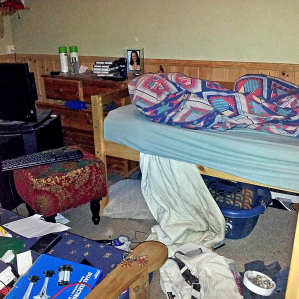

In [10]:
# ex of a messy room
Image.open("images/train/messy/45.png")

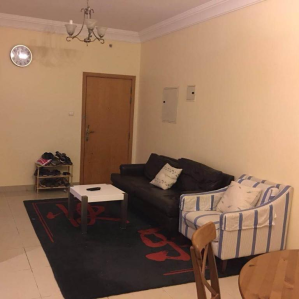

In [11]:
# ex of a clean room
Image.open("images/train/clean/45.png")

In [13]:
print(os.listdir(train_messy))

['0.png', '1.png', '10.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.png', '18.png', '19.png', '2.png', '20.png', '21.png', '22.png', '23.png', '24.png', '25.png', '26.png', '27.png', '28.png', '29.png', '3.png', '30.png', '31.png', '32.png', '33.png', '34.png', '35.png', '36.png', '37.png', '38.png', '39.png', '4.png', '40.png', '41.png', '42.png', '43.png', '44.png', '45.png', '46.png', '47.png', '48.png', '49.png', '5.png', '50.png', '51.png', '52.png', '53.png', '54.png', '55.png', '56.png', '57.png', '58.png', '59.png', '6.png', '60.png', '61.png', '62.png', '63.png', '64.png', '65.png', '66.png', '67.png', '68.png', '69.png', '7.png', '70.png', '71.png', '72.png', '73.png', '74.png', '75.png', '76.png', '77.png', '78.png', '79.png', '8.png', '80.png', '81.png', '82.png', '83.png', '84.png', '85.png', '86.png', '87.png', '88.png', '89.png', '9.png', '90.png', '91.png', '92.png', '93.png', '94.png', '95.png']


In [15]:
print(os.path.join(train_messy,'67'))

images/train/messy\67


100%|█████████████████████████████████████████████████████████████████████████████████| 96/96 [00:00<00:00, 464.07it/s]


Text(0.5, 1.0, 'Messy and Clean Rooms in GrayScale')

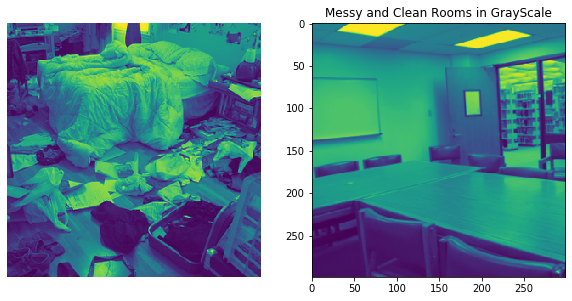

In [34]:
# tqdm is for progress bar
# size i saw from andrew ng
for image in tqdm(os.listdir(train_messy)): 
    path = os.path.join(train_messy, image)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    np_img=np.array(img)
    image_size = np_img.shape[0]
    img = cv2.resize(img, (image_size, image_size)).flatten()   

for image2 in tqdm(os.listdir(train_clean)): 
    path = os.path.join(train_clean, image2)
    img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    np_img2=np.array(img2)
    image_size = np_img.shape[0]
    img2 = cv2.resize(img2, (image_size, image_size)).flatten() 

# print(image_size)
# just plotting  
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img.reshape(image_size, image_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np_img2.reshape(image_size, image_size))
# plt.axis('off')
plt.title("Messy and Clean Rooms in GrayScale")

In [31]:
print(image_size)

299


In [46]:
# Train Data
def train_data1():
    train_data_messy = [] 
    train_data_clean=[]
    
    for image1 in tqdm(os.listdir(train_messy)): 
        path = os.path.join(train_messy, image)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        train_data_messy.append(img1) 

    for image2 in tqdm(os.listdir(train_clean)): 
        path = os.path.join(train_clean, image)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        train_data_clean.append(img2) 
    
    train_data= np.concatenate((np.asarray(train_data_messy),np.asarray(train_data_clean)),axis=0)
    return train_data 

In [47]:
# Test Data
def test_data1():
    test_data_messy = [] 
    test_data_clean=[]
    
    for image1 in tqdm(os.listdir(test_messy)): 
        path = os.path.join(test_messy, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        test_data_messy.append(img1) 
    for image2 in tqdm(os.listdir(test_clean)): 
        path = os.path.join(test_clean, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        test_data_clean.append(img2) 
    
    test_data= np.concatenate((np.asarray(test_data_messy),np.asarray(test_data_clean)),axis=0) 
    return test_data 

In [50]:
train_data = train_data1() 
#print(train_data)
test_data = test_data1()

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 407.51it/s]


In [62]:
x_data=np.concatenate((train_data,test_data),axis=0)
# print(x_data)
#x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))  # normalize data
x_data = x_data/255
# print(x_data)

In [63]:
z1 = np.zeros(96)
o1 = np.ones(96)
Y_train = np.concatenate((o1, z1), axis=0)
z = np.zeros(10)
o = np.ones(10)
Y_test = np.concatenate((o, z), axis=0)

In [64]:
y_data=np.concatenate((Y_train,Y_test),axis=0).reshape(x_data.shape[0],1)

In [65]:
print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)

X shape:  (212, 299, 299)
Y shape:  (212, 1)


In [67]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)

number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

In [68]:
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)

X train flatten (180, 89401)
X test flatten (32, 89401)


In [69]:
x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_test = y_test.T
y_train = y_train.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (89401, 180)
x test:  (89401, 32)
y train:  (1, 180)
y test:  (1, 32)


## Logistic Regression

In [70]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iterarion):
        
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 100 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

def predict(w,b,x_test):
    
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):

    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    
    print("Test Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100,2)))
    print("Train Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100,2)))

C:\Users\91865\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
C:\Users\91865\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


Cost after iteration 0: nan
Cost after iteration 100: 0.007976
Cost after iteration 200: 0.002142
Cost after iteration 300: 0.001326
Cost after iteration 400: 0.000977
Cost after iteration 500: 0.000779
Cost after iteration 600: 0.000649
Cost after iteration 700: 0.000558
Cost after iteration 800: 0.000489
Cost after iteration 900: 0.000436
Cost after iteration 1000: 0.000394
Cost after iteration 1100: 0.000359
Cost after iteration 1200: 0.000330
Cost after iteration 1300: 0.000305
Cost after iteration 1400: 0.000284


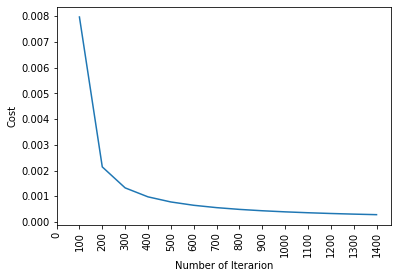

Test Accuracy: 100.0 %
Train Accuracy: 100.0 %


In [78]:
logistic_regression_model = logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 1500)

C:\Users\91865\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
C:\Users\91865\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


Cost after iteration 0: nan
Cost after iteration 100: 0.007976
Cost after iteration 200: 0.002142
Cost after iteration 300: 0.001326
Cost after iteration 400: 0.000977
Cost after iteration 500: 0.000779
Cost after iteration 600: 0.000649
Cost after iteration 700: 0.000558
Cost after iteration 800: 0.000489
Cost after iteration 900: 0.000436
Cost after iteration 1000: 0.000394
Cost after iteration 1100: 0.000359
Cost after iteration 1200: 0.000330
Cost after iteration 1300: 0.000305
Cost after iteration 1400: 0.000284
Cost after iteration 1500: 0.000266
Cost after iteration 1600: 0.000250
Cost after iteration 1700: 0.000235
Cost after iteration 1800: 0.000223
Cost after iteration 1900: 0.000211


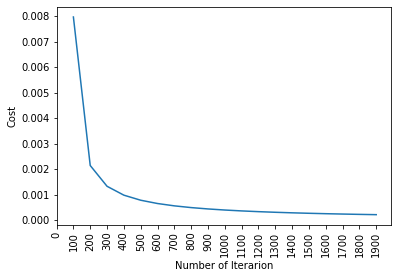

Test Accuracy: 100.0 %
Train Accuracy: 100.0 %


In [72]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 2000)

[[0.58039216]
 [0.25098039]
 [0.02745098]
 ...
 [0.22745098]
 [0.25882353]
 [0.33333333]]


TypeError: 'NoneType' object is not subscriptable

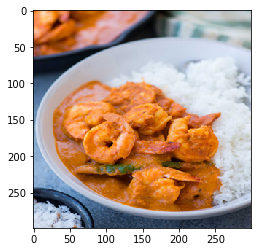

In [81]:
# testing out

# change this to the name of your image file
my_image = "goan.jpg"   

# We preprocess the image to fit your algorithm.
fname = "goan.jpg"
image = np.array(Image.open(fname).resize((image_size, image_size)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, image_size * image_size * 3)).T

print(image)
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")